In [1]:
from google.colab import drive

drive.mount('/content/drive')
!cp drive/My\ Drive/Elliptic++\ Dataset/wallets_features.csv ./
!cp drive/My\ Drive/Elliptic++\ Dataset/wallets_classes.csv ./
!cp drive/My\ Drive/Elliptic++\ Dataset/AddrAddr_edgelist.csv ./
!cp drive/My\ Drive/Elliptic++\ Dataset/AddrTx_edgelist.csv ./
!cp drive/My\ Drive/Elliptic++\ Dataset/TxAddr_edgelist.csv ./
!cp drive/My\ Drive/Elliptic++\ Dataset/wallets_features_classes_combined.csv ./

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import plotly.graph_objs as go
import plotly.offline as py
import math
from collections import Counter

!pip install -U ipython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.5/819.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.7.1
    Uninstalling traitlets-5.7.1:
      Successfully uninstalled traitlets-5.7.1
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.28.0 which is incompatible.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.base import clone

import xgboost as xgb

In [4]:
from sklearn.inspection import permutation_importance

In [5]:
# # Assuming you have a fitted model `model` and test data `X_test`, `y_test`
# result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# # Access importance scores
# importance_scores = result.importances_mean
# print(importance_scores)

In [6]:
print("\nActors features: \n")
df_wallets_features = pd.read_csv("wallets_features.csv")
df_wallets_features

print("\nActors Classes: \n")
df_wallets_classes = pd.read_csv("wallets_classes.csv")
df_wallets_classes

print("\nAddress-Address edgelist: \n") #Actor Interaction graph edgelist
df_AddrAddr_edgelist = pd.read_csv("AddrAddr_edgelist.csv")
df_AddrAddr_edgelist

print("\nAddress-Transaction edgelist: \n") #Address-Transaction graph edgelist
df_AddrTx_edgelist = pd.read_csv("AddrTx_edgelist.csv")
df_AddrTx_edgelist

print("\nTransaction-Address edgelist: \n") #Address-Transaction graph edgelist
df_TxAddr_edgelist = pd.read_csv("TxAddr_edgelist.csv")
df_TxAddr_edgelist

# combined features and classes csv files for convenience
df_wallets_features_classes_combined = pd.read_csv("wallets_features_classes_combined.csv")



Actors features: 



,address,Time step,num_txs_as_sender,num_txs_as receiver,first_block_appeared_in,last_block_appeared_in,lifetime_in_blocks,total_txs,first_sent_block,first_received_block,...,blocks_btwn_output_txs_min,blocks_btwn_output_txs_max,blocks_btwn_output_txs_mean,blocks_btwn_output_txs_median,num_addr_transacted_multiple,transacted_w_address_total,transacted_w_address_min,transacted_w_address_max,transacted_w_address_mean,transacted_w_address_median
0,111112TykSw72ztDN2WJger4cynzWYC5w,25,0.0,1.0,439586.0,439586.0,0.0,1.0,0.0,439586.0,...,0.0,0.0,0.000000,0.0,0.0,24.0,1.0,1.0,1.0,1.0
1,1111DAYXhoxZx2tsRnzimfozo783x1yC2,25,0.0,8.0,439589.0,485959.0,46370.0,8.0,0.0,439589.0,...,0.0,20164.0,6624.285714,8060.0,0.0,8.0,1.0,1.0,1.0,1.0
2,1111DAYXhoxZx2tsRnzimfozo783x1yC2,29,0.0,8.0,439589.0,485959.0,46370.0,8.0,0.0,439589.0,...,0.0,20164.0,6624.285714,8060.0,0.0,8.0,1.0,1.0,1.0,1.0
3,1111DAYXhoxZx2tsRnzimfozo783x1yC2,39,0.0,8.0,439589.0,485959.0,46370.0,8.0,0.0,439589.0,...,0.0,20164.0,6624.285714,8060.0,0.0,8.0,1.0,1.0,1.0,1.0
4,1111DAYXhoxZx2tsRnzimfozo783x1yC2,39,0.0,8.0,439589.0,485959.0,46370.0,8.0,0.0,439589.0,...,0.0,20164.0,6624.285714,8060.0,0.0,8.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268255,3R2Uw5MRdSSigp8AjfT7K5es6Hupm4qLSq,31,1.0,1.0,451684.0,451685.0,1.0,2.0,451685.0,451684.0,...,0.0,0.0,0.000000,0.0,0.0,3.0,1.0,1.0,1.0,1.0
1268256,3R2VBFbqHGC4bQ7b4ixN4jZTdv7RMbEYtf,44,0.0,1.0,477895.0,477895.0,0.0,1.0,0.0,477895.0,...,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1268257,3R2WFmRwbDeo3rMVVu5J3jjMxAuQYYWAid,9,0.0,1.0,407342.0,407342.0,0.0,1.0,0.0,407342.0,...,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1268258,3R2WTZGYLmbJQyoDSBftJsPRvF1mSEtkh6,3,0.0,1.0,395235.0,395235.0,0.0,1.0,0.0,395235.0,...,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0



Actors Classes: 



,address,class
0,111112TykSw72ztDN2WJger4cynzWYC5w,2
1,1111DAYXhoxZx2tsRnzimfozo783x1yC2,3
2,1111VHuXEzHaRCgXbVwojtaP7Co3QABb,2
3,111218KKkh1JJFRHbwM16AwCiVCc4m7he1,3
4,1115LWW3xsD9jT9VRY7viCN9S34RVAAuA,2
...,...,...
822937,3R2Uw5MRdSSigp8AjfT7K5es6Hupm4qLSq,3
822938,3R2VBFbqHGC4bQ7b4ixN4jZTdv7RMbEYtf,3
822939,3R2WFmRwbDeo3rMVVu5J3jjMxAuQYYWAid,3
822940,3R2WTZGYLmbJQyoDSBftJsPRvF1mSEtkh6,3



Address-Address edgelist: 



,input_address,output_address
0,14YRXHHof4BY1TVxN5FqYPcEdpmXiYT78a,1GASxu5nMntiRKdVtTVRvEbP965G51bhHH
1,14YRXHHof4BY1TVxN5FqYPcEdpmXiYT78a,14YRXHHof4BY1TVxN5FqYPcEdpmXiYT78a
2,13Lhad3SAmu2vqYg2dxbNcxH7LE77kJu2w,1GFdrdgtG34GChM8SMpMwcXFc4nYbH1A5G
3,1MAQQZn7EHP6J3erXByCciFiVcgS8ZhWqz,19q57SeCEzTnWrWVXA43nZzhSiXkYggh7c
4,1MAQQZn7EHP6J3erXByCciFiVcgS8ZhWqz,1Kk1NVYnCE8ALXDhgMM6HqTt1jDSvi6QBA
...,...,...
2868959,3MfN5to5K5be2RupWE8rjJHQ6V9L8ypWeh,3MfN5to5K5be2RupWE8rjJHQ6V9L8ypWeh
2868960,3DzbpEogZ1mn9FgCHcmzYPLDbV9GuxYHpi,38jMiiZs2C5n5MPkyc5pSA7wwW6H4p6hPa
2868961,34yD1sQg6C16aANCtibYXRj5NsX6tt4v5R,3G9b7hWZccuft1V4eGUcZqTZaxsqx699bM
2868962,1JERHCgwHG2Z7T3KjNpEwj3fJNX8vSfCX2,1JERHCgwHG2Z7T3KjNpEwj3fJNX8vSfCX2



Address-Transaction edgelist: 



,input_address,txId
0,14YRXHHof4BY1TVxN5FqYPcEdpmXiYT78a,230325127
1,13Lhad3SAmu2vqYg2dxbNcxH7LE77kJu2w,230325139
2,1MAQQZn7EHP6J3erXByCciFiVcgS8ZhWqz,86875675
3,16zs5SVSyADh5WrLNbZbpRLsBsN5uEzgeK,230325147
4,1QJpwtUorBKPGUJkSyrRcBKTAHq4CXrdYh,230325154
...,...,...
477112,1HdnGvuc21Y4QfBEHUc3NFRJhGywdSFUb,157659046
477113,3MfN5to5K5be2RupWE8rjJHQ6V9L8ypWeh,157659306
477114,3DzbpEogZ1mn9FgCHcmzYPLDbV9GuxYHpi,157668825
477115,34yD1sQg6C16aANCtibYXRj5NsX6tt4v5R,125788182



Transaction-Address edgelist: 



,txId,output_address
0,230325127,1GASxu5nMntiRKdVtTVRvEbP965G51bhHH
1,230325127,14YRXHHof4BY1TVxN5FqYPcEdpmXiYT78a
2,230325139,1GFdrdgtG34GChM8SMpMwcXFc4nYbH1A5G
3,86875675,19q57SeCEzTnWrWVXA43nZzhSiXkYggh7c
4,86875675,1Kk1NVYnCE8ALXDhgMM6HqTt1jDSvi6QBA
...,...,...
837119,157659306,3MfN5to5K5be2RupWE8rjJHQ6V9L8ypWeh
837120,157668825,38jMiiZs2C5n5MPkyc5pSA7wwW6H4p6hPa
837121,125788182,3G9b7hWZccuft1V4eGUcZqTZaxsqx699bM
837122,157670868,1JERHCgwHG2Z7T3KjNpEwj3fJNX8vSfCX2


In [7]:
print("\nwallets_features.csv for address = 39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K\n")
df_wallets_features[df_wallets_features['address']=='39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K']

print("\nwallets_classes.csv for address = 39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K\n")
df_wallets_classes[df_wallets_classes['address']=='39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K']

print("\nAddrAddr_edgelist.csv for address = 39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K0\n")
df_AddrAddr_edgelist[(df_AddrAddr_edgelist['input_address']=='39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K') | (df_AddrAddr_edgelist['output_address']=='39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K')]

print("\nAddrTx_edgelist.csv for address = 39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K0\n")
df_AddrTx_edgelist[df_AddrTx_edgelist['input_address']=='39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K']

print("\nTxAddr_edgelist.csv for address = 39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K0\n")
df_TxAddr_edgelist[df_TxAddr_edgelist['output_address']=='39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K']




wallets_features.csv for address = 39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K



,address,Time step,num_txs_as_sender,num_txs_as receiver,first_block_appeared_in,last_block_appeared_in,lifetime_in_blocks,total_txs,first_sent_block,first_received_block,...,blocks_btwn_output_txs_min,blocks_btwn_output_txs_max,blocks_btwn_output_txs_mean,blocks_btwn_output_txs_median,num_addr_transacted_multiple,transacted_w_address_total,transacted_w_address_min,transacted_w_address_max,transacted_w_address_mean,transacted_w_address_median
1149250,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,23,420.0,1.0,435559.0,453704.0,18145.0,421.0,435559.0,451682.0,...,0.0,0.0,0.0,0.0,17.0,495.0,1.0,3.0,1.046512,1.0
1149251,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,23,420.0,1.0,435559.0,453704.0,18145.0,421.0,435559.0,451682.0,...,0.0,0.0,0.0,0.0,17.0,495.0,1.0,3.0,1.046512,1.0
1149252,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,23,420.0,1.0,435559.0,453704.0,18145.0,421.0,435559.0,451682.0,...,0.0,0.0,0.0,0.0,17.0,495.0,1.0,3.0,1.046512,1.0
1149253,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,23,420.0,1.0,435559.0,453704.0,18145.0,421.0,435559.0,451682.0,...,0.0,0.0,0.0,0.0,17.0,495.0,1.0,3.0,1.046512,1.0
1149254,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,24,420.0,1.0,435559.0,453704.0,18145.0,421.0,435559.0,451682.0,...,0.0,0.0,0.0,0.0,17.0,495.0,1.0,3.0,1.046512,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149666,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,32,420.0,1.0,435559.0,453704.0,18145.0,421.0,435559.0,451682.0,...,0.0,0.0,0.0,0.0,17.0,495.0,1.0,3.0,1.046512,1.0
1149667,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,32,420.0,1.0,435559.0,453704.0,18145.0,421.0,435559.0,451682.0,...,0.0,0.0,0.0,0.0,17.0,495.0,1.0,3.0,1.046512,1.0
1149668,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,32,420.0,1.0,435559.0,453704.0,18145.0,421.0,435559.0,451682.0,...,0.0,0.0,0.0,0.0,17.0,495.0,1.0,3.0,1.046512,1.0
1149669,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,32,420.0,1.0,435559.0,453704.0,18145.0,421.0,435559.0,451682.0,...,0.0,0.0,0.0,0.0,17.0,495.0,1.0,3.0,1.046512,1.0



wallets_classes.csv for address = 39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K



,address,class
745591,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,1



AddrAddr_edgelist.csv for address = 39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K0



,input_address,output_address
1317522,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,131fHSzsK1eQJp7bC94JVWZqJ2JcdR5UfS
1317523,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K
1317634,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,1FCw4XNAP6xeWMF4o3RaNENguE9qFumgpn
1317635,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K
1317644,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K
...,...,...
1592119,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K
1592120,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K
1592121,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,32ZkfqSGoxdx5UGo8YQp1tFhSv8R982Usk
1592122,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K



AddrTx_edgelist.csv for address = 39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K0



,input_address,txId
235194,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,291338524
235250,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,88250674
235255,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,331553508
235256,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,331553509
239085,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,289228146
...,...,...
298647,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,355110135
298648,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,355110139
298649,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,343635736
298650,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K,355110144



TxAddr_edgelist.csv for address = 39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K0



,txId,output_address
431088,291338524,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K
431200,88250674,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K
431209,331553508,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K
431212,331553509,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K
436269,289228146,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K
...,...,...
539069,355110135,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K
539071,355110139,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K
539073,343635736,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K
539074,355110144,39sfuA8pY4UfybgEZi7uvA13jkGzZpsg5K


In [8]:
df_wallets_features.columns


Index(['address', 'Time step', 'num_txs_as_sender', 'num_txs_as receiver',
       'first_block_appeared_in', 'last_block_appeared_in',
       'lifetime_in_blocks', 'total_txs', 'first_sent_block',
       'first_received_block', 'num_timesteps_appeared_in',
       'btc_transacted_total', 'btc_transacted_min', 'btc_transacted_max',
       'btc_transacted_mean', 'btc_transacted_median', 'btc_sent_total',
       'btc_sent_min', 'btc_sent_max', 'btc_sent_mean', 'btc_sent_median',
       'btc_received_total', 'btc_received_min', 'btc_received_max',
       'btc_received_mean', 'btc_received_median', 'fees_total', 'fees_min',
       'fees_max', 'fees_mean', 'fees_median', 'fees_as_share_total',
       'fees_as_share_min', 'fees_as_share_max', 'fees_as_share_mean',
       'fees_as_share_median', 'blocks_btwn_txs_total', 'blocks_btwn_txs_min',
       'blocks_btwn_txs_max', 'blocks_btwn_txs_mean', 'blocks_btwn_txs_median',
       'blocks_btwn_input_txs_total', 'blocks_btwn_input_txs_min',
       

In [9]:
df_wallets_classification = df_wallets_features_classes_combined
df_wallets_classification = df_wallets_classification.drop(columns=['Time step']).drop_duplicates()
df_wallets_classification

,address,class,num_txs_as_sender,num_txs_as receiver,first_block_appeared_in,last_block_appeared_in,lifetime_in_blocks,total_txs,first_sent_block,first_received_block,...,blocks_btwn_output_txs_min,blocks_btwn_output_txs_max,blocks_btwn_output_txs_mean,blocks_btwn_output_txs_median,num_addr_transacted_multiple,transacted_w_address_total,transacted_w_address_min,transacted_w_address_max,transacted_w_address_mean,transacted_w_address_median
0,111112TykSw72ztDN2WJger4cynzWYC5w,2,0.0,1.0,439586.0,439586.0,0.0,1.0,0.0,439586.0,...,0.0,0.0,0.000000,0.0,0.0,24.0,1.0,1.0,1.0,1.0
1,1111DAYXhoxZx2tsRnzimfozo783x1yC2,3,0.0,8.0,439589.0,485959.0,46370.0,8.0,0.0,439589.0,...,0.0,20164.0,6624.285714,8060.0,0.0,8.0,1.0,1.0,1.0,1.0
9,1111VHuXEzHaRCgXbVwojtaP7Co3QABb,2,0.0,1.0,431522.0,431522.0,0.0,1.0,0.0,431522.0,...,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0
10,111218KKkh1JJFRHbwM16AwCiVCc4m7he1,3,1.0,1.0,423456.0,423456.0,0.0,2.0,423456.0,423456.0,...,0.0,0.0,0.000000,0.0,0.0,4.0,1.0,1.0,1.0,1.0
12,1115LWW3xsD9jT9VRY7viCN9S34RVAAuA,2,0.0,1.0,429513.0,429513.0,0.0,1.0,0.0,429513.0,...,0.0,0.0,0.000000,0.0,0.0,5.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268254,3R2Uw5MRdSSigp8AjfT7K5es6Hupm4qLSq,3,1.0,1.0,451684.0,451685.0,1.0,2.0,451685.0,451684.0,...,0.0,0.0,0.000000,0.0,0.0,3.0,1.0,1.0,1.0,1.0
1268256,3R2VBFbqHGC4bQ7b4ixN4jZTdv7RMbEYtf,3,0.0,1.0,477895.0,477895.0,0.0,1.0,0.0,477895.0,...,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1268257,3R2WFmRwbDeo3rMVVu5J3jjMxAuQYYWAid,3,0.0,1.0,407342.0,407342.0,0.0,1.0,0.0,407342.0,...,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1268258,3R2WTZGYLmbJQyoDSBftJsPRvF1mSEtkh6,3,0.0,1.0,395235.0,395235.0,0.0,1.0,0.0,395235.0,...,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0


In [10]:
for column in df_wallets_classification.columns[2:]:
    feature = np.array(df_wallets_classification[column]).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(feature)
    feature_scaled = scaler.transform(feature)
    df_wallets_classification[column] = feature_scaled.reshape(1,-1)[0]

df_wallets_classification

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

,address,class,num_txs_as_sender,num_txs_as receiver,first_block_appeared_in,last_block_appeared_in,lifetime_in_blocks,total_txs,first_sent_block,first_received_block,...,blocks_btwn_output_txs_min,blocks_btwn_output_txs_max,blocks_btwn_output_txs_mean,blocks_btwn_output_txs_median,num_addr_transacted_multiple,transacted_w_address_total,transacted_w_address_min,transacted_w_address_max,transacted_w_address_mean,transacted_w_address_median
0,111112TykSw72ztDN2WJger4cynzWYC5w,2,0.000000,0.001825,0.499985,0.499985,0.000000,0.000000,0.000000,0.900837,...,0.0,0.000000,0.000000,0.000000,0.0,0.000608,0.0,0.0,0.0,0.0
1,1111DAYXhoxZx2tsRnzimfozo783x1yC2,3,0.000000,0.014599,0.500015,0.979168,0.479153,0.004762,0.000000,0.900843,...,0.0,0.208377,0.068456,0.083293,0.0,0.000185,0.0,0.0,0.0,0.0
9,1111VHuXEzHaRCgXbVwojtaP7Co3QABb,2,0.000000,0.001825,0.416657,0.416657,0.000000,0.000000,0.000000,0.884312,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
10,111218KKkh1JJFRHbwM16AwCiVCc4m7he1,3,0.000688,0.001825,0.333309,0.333309,0.000000,0.000680,0.867782,0.867782,...,0.0,0.000000,0.000000,0.000000,0.0,0.000079,0.0,0.0,0.0,0.0
12,1115LWW3xsD9jT9VRY7viCN9S34RVAAuA,2,0.000000,0.001825,0.395898,0.395898,0.000000,0.000000,0.000000,0.880195,...,0.0,0.000000,0.000000,0.000000,0.0,0.000106,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268254,3R2Uw5MRdSSigp8AjfT7K5es6Hupm4qLSq,3,0.000688,0.001825,0.624996,0.625006,0.000010,0.000680,0.925631,0.925629,...,0.0,0.000000,0.000000,0.000000,0.0,0.000053,0.0,0.0,0.0,0.0
1268256,3R2VBFbqHGC4bQ7b4ixN4jZTdv7RMbEYtf,3,0.000000,0.001825,0.895841,0.895841,0.000000,0.000000,0.000000,0.979343,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1268257,3R2WFmRwbDeo3rMVVu5J3jjMxAuQYYWAid,3,0.000000,0.001825,0.166799,0.166799,0.000000,0.000000,0.000000,0.834760,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1268258,3R2WTZGYLmbJQyoDSBftJsPRvF1mSEtkh6,3,0.000000,0.001825,0.041695,0.041695,0.000000,0.000000,0.000000,0.809949,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [11]:
# remove 'unknown' actors
data = df_wallets_classification.loc[(df_wallets_classification['class'] != 3), 'address']
df_wallets_feature_selected = df_wallets_classification.loc[df_wallets_classification['address'].isin(data)]
df_wallets_feature_selected

,address,class,num_txs_as_sender,num_txs_as receiver,first_block_appeared_in,last_block_appeared_in,lifetime_in_blocks,total_txs,first_sent_block,first_received_block,...,blocks_btwn_output_txs_min,blocks_btwn_output_txs_max,blocks_btwn_output_txs_mean,blocks_btwn_output_txs_median,num_addr_transacted_multiple,transacted_w_address_total,transacted_w_address_min,transacted_w_address_max,transacted_w_address_mean,transacted_w_address_median
0,111112TykSw72ztDN2WJger4cynzWYC5w,2,0.000000,0.001825,0.499985,0.499985,0.000000,0.00000,0.00000,0.900837,...,0.0,0.0,0.0,0.0,0.0,0.000608,0.0,0.0,0.0,0.0
9,1111VHuXEzHaRCgXbVwojtaP7Co3QABb,2,0.000000,0.001825,0.416657,0.416657,0.000000,0.00000,0.00000,0.884312,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
12,1115LWW3xsD9jT9VRY7viCN9S34RVAAuA,2,0.000000,0.001825,0.395898,0.395898,0.000000,0.00000,0.00000,0.880195,...,0.0,0.0,0.0,0.0,0.0,0.000106,0.0,0.0,0.0,0.0
13,1117wASFaYgJJP6MiY8cPD5DMdQda8gDZ,2,0.000688,0.001825,0.083379,0.083400,0.000021,0.00068,0.81822,0.818216,...,0.0,0.0,0.0,0.0,0.0,0.000053,0.0,0.0,0.0,0.0
15,111ECNFEjJsQJ6LkAsAESBGTHBvZE66oX,2,0.000000,0.001825,0.333371,0.333371,0.000000,0.00000,0.00000,0.867794,...,0.0,0.0,0.0,0.0,0.0,0.000264,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268243,3R2KQxz2Uk7xF9bfDGffTn52NrfnBjdaLy,2,0.000000,0.001825,0.208360,0.208360,0.000000,0.00000,0.00000,0.843002,...,0.0,0.0,0.0,0.0,0.0,0.000079,0.0,0.0,0.0,0.0
1268244,3R2LAgPtnjeU2XdyR1GUXaTzKmh81VETYm,2,0.000000,0.001825,0.458331,0.458331,0.000000,0.00000,0.00000,0.892576,...,0.0,0.0,0.0,0.0,0.0,0.000106,0.0,0.0,0.0,0.0
1268251,3R2SZEK2UggNm1ntkXTe8eoea11sxg9vjw,2,0.000000,0.001825,0.312508,0.312508,0.000000,0.00000,0.00000,0.863657,...,0.0,0.0,0.0,0.0,0.0,0.000211,0.0,0.0,0.0,0.0
1268252,3R2TfX1PDN93SHbDXZqYPCn1cgmCeLMBra,2,0.000000,0.001825,0.479173,0.479173,0.000000,0.00000,0.00000,0.896710,...,0.0,0.0,0.0,0.0,0.0,0.000264,0.0,0.0,0.0,0.0


In [12]:
# Goal: binary classification of 0,1
# 0: licit, 1: illicit

# change illicit (class-2) to '0' for classification
y = df_wallets_feature_selected[['class']]
y = y['class'].apply(lambda x: 0 if x == 2 else 1 )

X_train, X_test, y_train, y_test = train_test_split(df_wallets_feature_selected,y,test_size=0.30,random_state=15, shuffle=False)
X_train = X_train.drop(columns=['address', 'class'])
X_test = X_test.drop(columns=['address', 'class'])

In [13]:
# LOGISTIC REGRESSION (LR)
cLR = LogisticRegression(max_iter=1000).fit(X_train.values,y_train.values)
y_preds_LR = cLR.predict(X_test.values)
prec,rec,f1,num = precision_recall_fscore_support(y_test.values, y_preds_LR)

print("Logistic Regression")
print("Precision: %.3f \nRecall: %.3f \nF1 Score: %.3f"%(prec[1],rec[1],f1[1]))
micro_f1 = f1_score(y_test, y_preds_LR, average='micro')
print("Micro-Average F1 Score: %.3f"%(micro_f1))

Logistic Regression
Precision: 0.491 
Recall: 0.057 
F1 Score: 0.102
Micro-Average F1 Score: 0.964


In [14]:
# RANDOM FOREST (RF)
cRF = RandomForestClassifier(n_estimators=50).fit(X_train.values,y_train.values)
y_preds_RF = cRF.predict(X_test.values)
prec,rec,f1,num = precision_recall_fscore_support(y_test.values, y_preds_RF)

print("Random Forest 50 trees")
print("Precision: %.3f \nRecall: %.3f \nF1 Score: %.3f"%(prec[1],rec[1],f1[1]))
micro_f1 = f1_score(y_test, y_preds_RF, average='micro')
print("Micro-Average F1 Score: %.3f"%(micro_f1))


Random Forest 50 trees
Precision: 0.909 
Recall: 0.787 
F1 Score: 0.844
Micro-Average F1 Score: 0.989


In [15]:
# MULTILAYER PERCEPTRON (MLP)
cMLP = MLPClassifier(solver='adam', learning_rate_init=0.001, max_iter=500).fit(X_train.values,y_train.values)
y_preds_MLP = cMLP.predict(X_test.values)
prec,rec,f1,num = precision_recall_fscore_support(y_test.values, y_preds_MLP)

print("Multilayer Perceptron (MLP)")
print("Precision: %.3f \nRecall: %.3f \nF1 Score: %.3f"%(prec[1],rec[1],f1[1]))
micro_f1 = f1_score(y_test, y_preds_MLP, average='micro')
print("Micro-Average F1 Score: %.3f"%(micro_f1))


Multilayer Perceptron (MLP)
Precision: 0.766 
Recall: 0.444 
F1 Score: 0.562
Micro-Average F1 Score: 0.975


In [16]:
# XGBOOST (XGB)
cXGB = xgb.XGBClassifier(objective="multi:softmax", num_class=2, random_state=42)
cXGB.fit(X_train.values, y_train.values)
y_preds_XGB = cXGB.predict(X_test.values)
prec,rec,f1,num = precision_recall_fscore_support(y_test.values, y_preds_XGB)

print("XGBOOST")
print("Precision: %.3f \nRecall: %.3f \nF1 Score: %.3f"%(prec[1],rec[1],f1[1]))
micro_f1 = f1_score(y_test, y_preds_XGB, average='micro')
print("Micro-Average F1 Score: %.3f"%(micro_f1))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)

XGBOOST
Precision: 0.893 
Recall: 0.808 
F1 Score: 0.848
Micro-Average F1 Score: 0.989


In [17]:
# prompt: Add a LSTM Classifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import f1_score, accuracy_score

# Reshape data for LSTM (samples, timesteps, features)
# Assuming each row is a sample and we only have 1 timestep
X_train_lstm = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train_lstm, y_train, epochs=10, batch_size=32)

# Make predictions
y_pred_lstm = (model.predict(X_test_lstm) > 0.5).astype("int32")

# Evaluate model
lstm_f1 = f1_score(y_test, y_pred_lstm)
lstm_accuracy = accuracy_score(y_test, y_pred_lstm)

print("LSTM Classifier")
print("F1 Score: %.3f" % lstm_f1)
print("Accuracy: %.3f" % lstm_accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
5805/5805 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9331 - loss: 0.2544
Epoch 2/10
5805/5805 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9407 - loss: 0.1630
Epoch 3/10
5805/5805 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9494 - loss: 0.1509
Epoch 4/10
5805/5805 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9528 - loss: 0.1490
Epoch 5/10
5805/5805 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9542 - loss: 0.1442
Epoch 6/10
5805/5805 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9554 - loss: 0.1415
Epoch 7/10
5805/5805 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9555 - loss: 0.1397
Epoch 8/10
5805/5805 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9555 - loss: 0.1389
Epoch 9/10
5805/5805 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.9556 - loss: 0.1387
Epoch 10/10
5805/5805 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9570 - loss: 0.1348


2488/2488 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
LSTM Classifier
F1 Score: 0.481
Accuracy: 0.973


In [18]:
! pip install scikeras

In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import VotingClassifier
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Create a feedforward neural network (MLP) model
def create_mlp(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create an LSTM model
def create_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=(input_shape, 1), return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrapping the LSTM model for compatibility with scikit-learn
lstm_model = KerasClassifier(build_fn=create_lstm, input_shape=X_train.shape[1], epochs=10, batch_size=32, verbose=0)

# Wrapping the MLP model for compatibility with scikit-learn
mlp_model = KerasClassifier(build_fn=create_mlp, input_dim=X_train.shape[1], epochs=10, batch_size=32, verbose=0)

# Other models for the ensemble
lr = LogisticRegression()
rf = RandomForestClassifier()
xgb = XGBClassifier()
mlp_sklearn = MLPClassifier()

# Create a dictionary of your models for VotingClassifier
estimators = [
    ('lr', lr),
    ('rf', rf),
    ('mlp_sklearn', mlp_sklearn),
    ('xgb', xgb),
    ('lstm', lstm_model)  # LSTM model wrapped in KerasClassifier
]

# Create the ensemble model using soft voting
ensemble_model = VotingClassifier(estimators=estimators, voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions with the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model
ensemble_f1 = f1_score(y_test, y_pred_ensemble)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)

print("Ensemble Model (VotingClassifier)")
print(f"F1 Score: {ensemble_f1:.3f}")
print(f"Accuracy: {ensemble_accuracy:.3f}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('mlp_sklearn', MLPClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=No...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lstm',
                              KerasClassifier(batch_size=32, build_fn=<function create_lstm at 0x7d1272f5d480>, epochs=10, input_shape=55, verbose=0))],
                 voting='soft')

Ensemble Model (VotingClassifier)
F1 Score: 0.674
Accuracy: 0.982


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 55 artists>

([<matplotlib.axis.XTick at 0x7d12781be3b0>,
 [Text(0, 0, 'transacted_w_address_total'),
  Text(1, 0, 'first_sent_block'),
  Text(2, 0, 'fees_max'),
  Text(3, 0, 'first_block_appeared_in'),
  Text(4, 0, 'fees_median'),
  Text(5, 0, 'last_block_appeared_in'),
  Text(6, 0, 'fees_mean'),
  Text(7, 0, 'fees_min'),
  Text(8, 0, 'fees_total'),
  Text(9, 0, 'first_received_block'),
  Text(10, 0, 'fees_as_share_max'),
  Text(11, 0, 'fees_as_share_mean'),
  Text(12, 0, 'fees_as_share_median'),
  Text(13, 0, 'blocks_btwn_txs_total'),
  Text(14, 0, 'blocks_btwn_txs_mean'),
  Text(15, 0, 'lifetime_in_blocks'),
  Text(16, 0, 'fees_as_share_min'),
  Text(17, 0, 'fees_as_share_total'),
  Text(18, 0, 'blocks_btwn_txs_max'),
  Text(19, 0, 'blocks_btwn_txs_median'),
  Text(20, 0, 'total_txs'),
  Text(21, 0, 'btc_transacted_max'),
  Text(22, 0, 'btc_transacted_mean'),
  Text(23, 0, 'btc_transacted_min'),
  Text(24, 0, 'btc_transacted_median'),
  Text(25, 0, 'btc_sent_max'),
  Text(26, 0, 'btc_transacted_

(-1.0, 55.0)

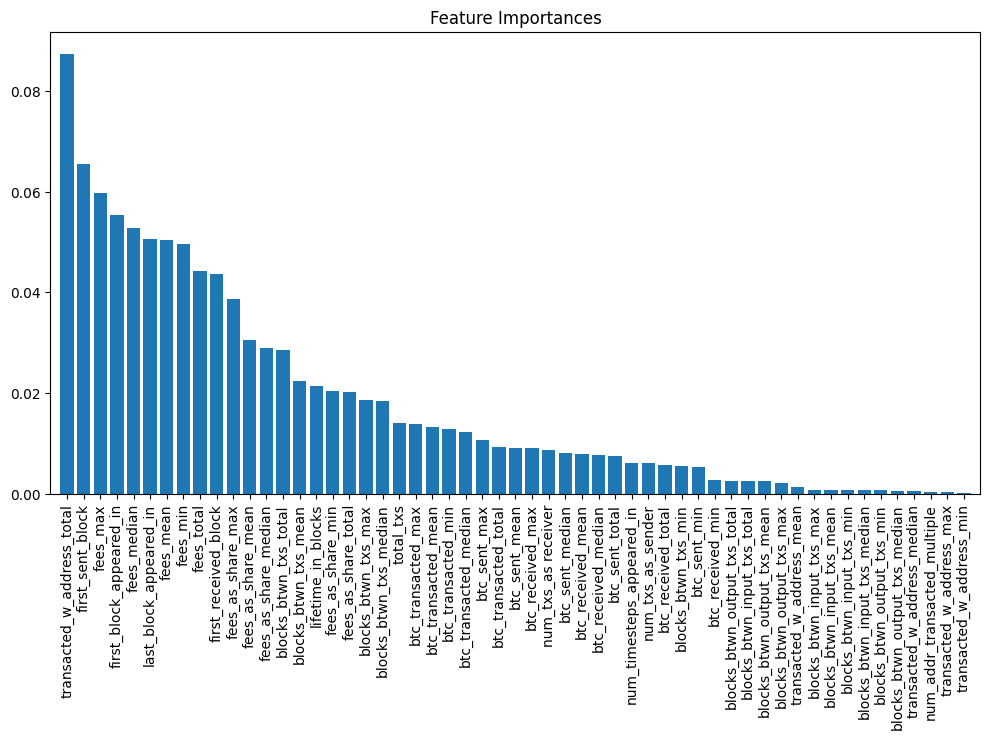

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.722222222222214, 0.5, 'True')

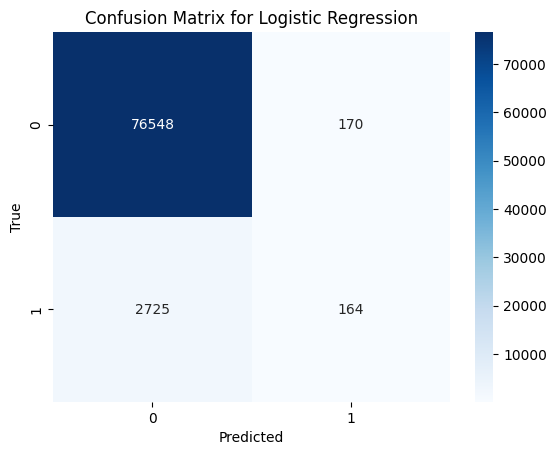

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.722222222222214, 0.5, 'True')

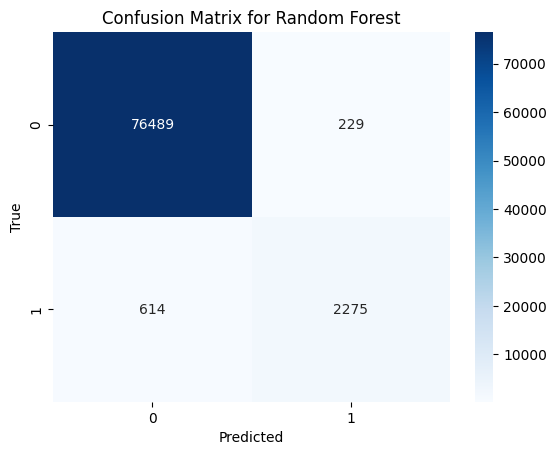

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix for MLP')

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.722222222222214, 0.5, 'True')

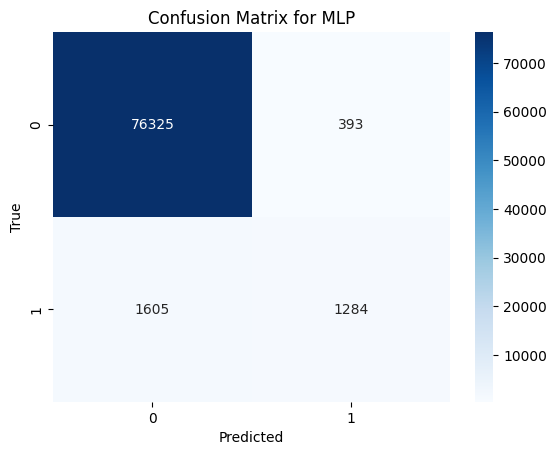

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix for XGBoost')

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.722222222222214, 0.5, 'True')

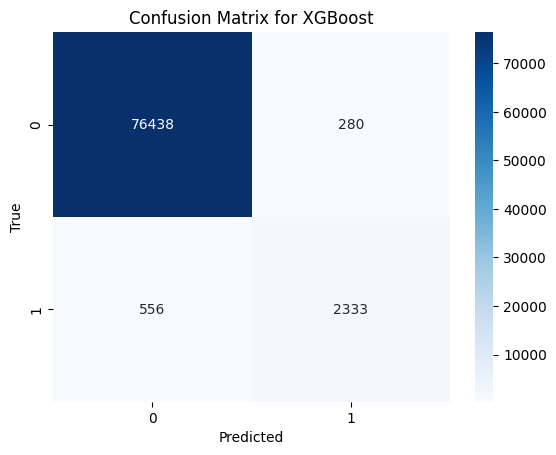

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix for LSTM')

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.722222222222214, 0.5, 'True')

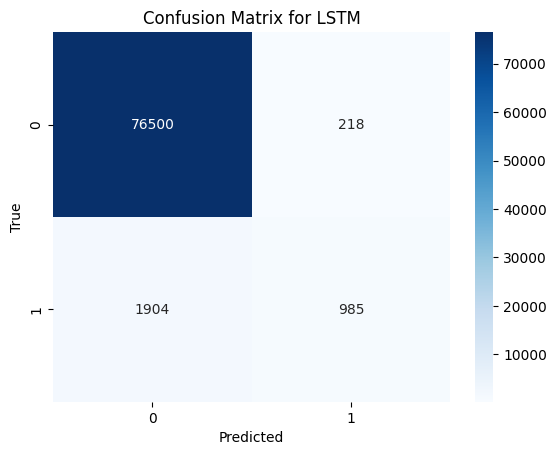

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix for Ensemble')

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.722222222222214, 0.5, 'True')

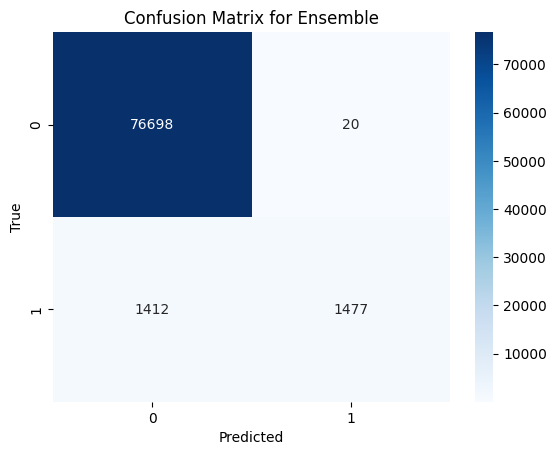

In [20]:

# Visualize the feature importance for Random Forest
importances = cRF.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


# Confusion matrix for Logistic Regression
cm_LR = confusion_matrix(y_test, y_preds_LR)
sns.heatmap(cm_LR, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Confusion matrix for Random Forest
cm_RF = confusion_matrix(y_test, y_preds_RF)
sns.heatmap(cm_RF, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Confusion matrix for MLP
cm_MLP = confusion_matrix(y_test, y_preds_MLP)
sns.heatmap(cm_MLP, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for MLP')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Confusion matrix for XGBoost
cm_XGB = confusion_matrix(y_test, y_preds_XGB)
sns.heatmap(cm_XGB, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Confusion matrix for LSTM
cm_LSTM = confusion_matrix(y_test, y_pred_lstm)
sns.heatmap(cm_LSTM, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LSTM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Confusion matrix for Ensemble
cm_Ensemble = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm_Ensemble, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Ensemble')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# You can add more visualizations as needed, such as ROC curves, precision-recall curves, etc.

In [21]:
#create a dictionary of our models
estimatorsRFMLP=[('MLP', cMLP), ('RF', cRF)]
#create our voting classifier, inputting our models
ensembleRFMLP = VotingClassifier(estimatorsRFMLP, voting='hard')
ensembleRFMLP.fit(X_train.values, y_train.values)
y_preds_RFMLP = ensembleRFMLP.predict(X_test.values)
prec,rec,f1,num = precision_recall_fscore_support(y_test.values, y_preds_RFMLP)

print("Ensemble: Random Forest (RF) + Multilayer Perceptron (MLP)")
print("Precision: %.3f \nRecall: %.3f \nF1 Score: %.3f"%(prec[1],rec[1],f1[1]))
micro_f1 = f1_score(y_test, y_preds_RFMLP, average='micro')
print("Micro-Average F1 Score: %.3f"%(micro_f1))

VotingClassifier(estimators=[('MLP', MLPClassifier(max_iter=500)),
                             ('RF', RandomForestClassifier(n_estimators=50))])

Ensemble: Random Forest (RF) + Multilayer Perceptron (MLP)
Precision: 0.991 
Recall: 0.326 
F1 Score: 0.491
Micro-Average F1 Score: 0.975


In [22]:
#create a dictionary of our models
estimatorsXGBRF=[('RF', cRF), ('XGB', cXGB)]
#create our voting classifier, inputting our models
ensembleXGBRF = VotingClassifier(estimatorsXGBRF, voting='hard')
ensembleXGBRF.fit(X_train.values, y_train.values)
y_preds_XGBRF = ensembleXGBRF.predict(X_test.values)
prec,rec,f1,num = precision_recall_fscore_support(y_test.values, y_preds_XGBRF)

print("Ensemble: XGBoost (XGB) + Random Forest (RF)")
print("Precision: %.3f \nRecall: %.3f \nF1 Score: %.3f"%(prec[1],rec[1],f1[1]))
micro_f1 = f1_score(y_test, y_preds_XGBRF, average='micro')
print("Micro-Average F1 Score: %.3f"%(micro_f1))

VotingClassifier(estimators=[('RF', RandomForestClassifier(n_estimators=50)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_class=2, num_parallel_tree=None, ...))])

Ensemble: XGBoost (XGB) + Random Forest (RF)
Precision: 0.945 
Recall: 0.767 
F1 Score: 0.847
Micro-Average F1 Score: 0.990


In [23]:
#create a dictionary of our models
estimatorsXGBRFMLP=[('XGB', cXGB), ('MLP', cMLP), ('RF', cRF)]
#create our voting classifier, inputting our models
ensembleXGBRFMLP = VotingClassifier(estimatorsXGBRFMLP, voting='hard')
ensembleXGBRFMLP.fit(X_train.values, y_train.values)
y_preds_XGBRFMLP = ensembleXGBRFMLP.predict(X_test.values)
prec,rec,f1,num = precision_recall_fscore_support(y_test.values, y_preds_XGBRFMLP)

print("Ensemble (all): XGBoost + Random Forest (RF) + Multilayer Perceptron (MLP)")
print("Precision: %.3f \nRecall: %.3f \nF1 Score: %.3f"%(prec[1],rec[1],f1[1]))
micro_f1 = f1_score(y_test, y_preds_XGBRFMLP, average='micro')
print("Micro-Average F1 Score: %.3f"%(micro_f1))

VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_class=2, num_parallel_tree=None, ...)),
                             ('MLP', MLPClassifier(max_iter=500)),
                             ('RF', RandomForestClassifier(n_estimators=50))])

Ensemble (all): XGBoost + Random Forest (RF) + Multilayer Perceptron (MLP)
Precision: 0.936 
Recall: 0.768 
F1 Score: 0.844
Micro-Average F1 Score: 0.990


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='class'>

Text(0.5, 1.0, 'Class Distribution')

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Count')

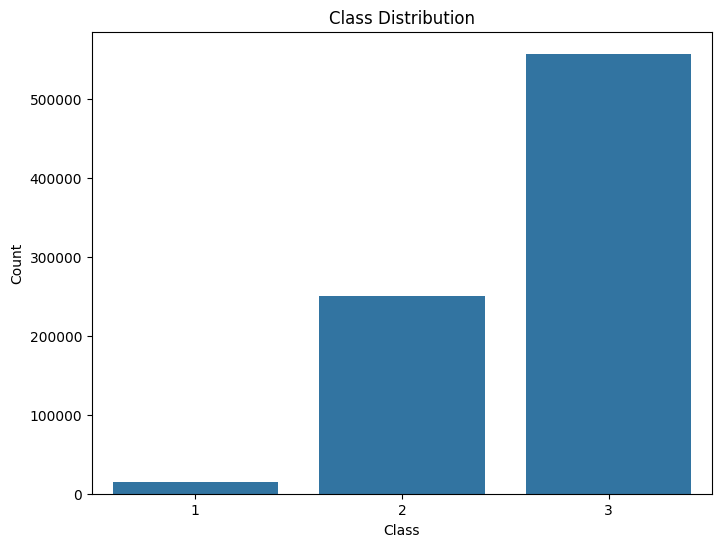

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Feature importances')

<BarContainer object of 55 artists>

([<matplotlib.axis.XTick at 0x7d1279fb5c00>,
 [Text(0, 0, 'transacted_w_address_total'),
  Text(1, 0, 'first_sent_block'),
  Text(2, 0, 'fees_max'),
  Text(3, 0, 'first_block_appeared_in'),
  Text(4, 0, 'fees_median'),
  Text(5, 0, 'last_block_appeared_in'),
  Text(6, 0, 'fees_mean'),
  Text(7, 0, 'fees_min'),
  Text(8, 0, 'fees_total'),
  Text(9, 0, 'first_received_block'),
  Text(10, 0, 'fees_as_share_max'),
  Text(11, 0, 'fees_as_share_mean'),
  Text(12, 0, 'fees_as_share_median'),
  Text(13, 0, 'blocks_btwn_txs_total'),
  Text(14, 0, 'blocks_btwn_txs_mean'),
  Text(15, 0, 'lifetime_in_blocks'),
  Text(16, 0, 'fees_as_share_min'),
  Text(17, 0, 'fees_as_share_total'),
  Text(18, 0, 'blocks_btwn_txs_max'),
  Text(19, 0, 'blocks_btwn_txs_median'),
  Text(20, 0, 'total_txs'),
  Text(21, 0, 'btc_transacted_max'),
  Text(22, 0, 'btc_transacted_mean'),
  Text(23, 0, 'btc_transacted_min'),
  Text(24, 0, 'btc_transacted_median'),
  Text(25, 0, 'btc_sent_max'),
  Text(26, 0, 'btc_transacted_

(-1.0, 55.0)

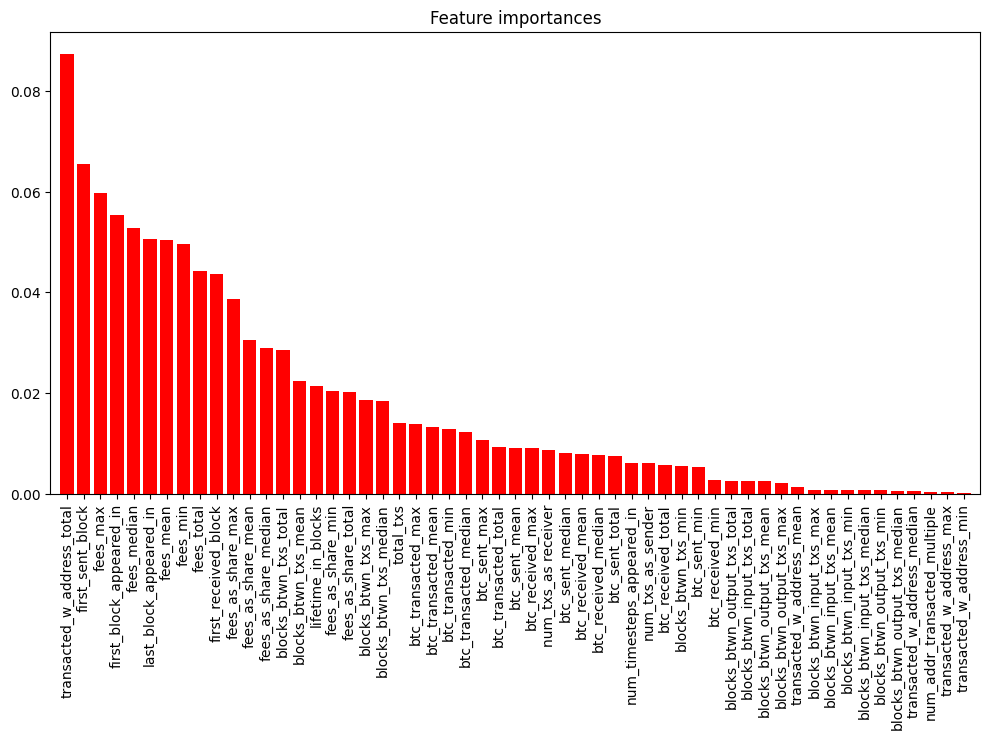

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix (Random Forest)')

Text(0.5, 36.72222222222221, 'Predicted Label')

Text(70.72222222222221, 0.5, 'True Label')

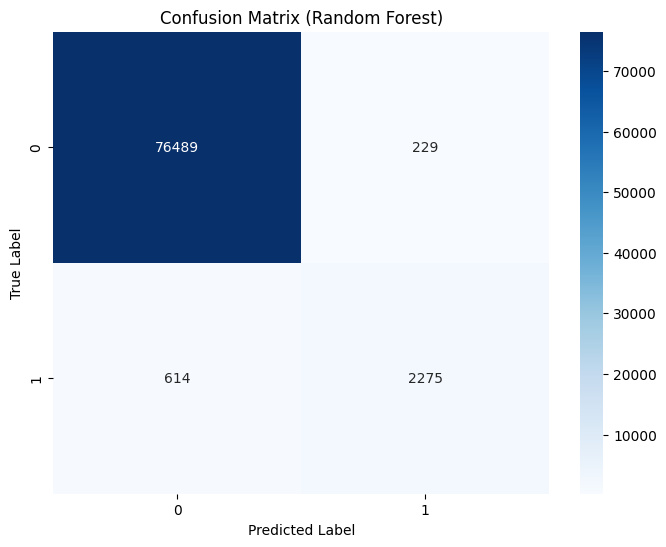

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (Logistic Regression)')

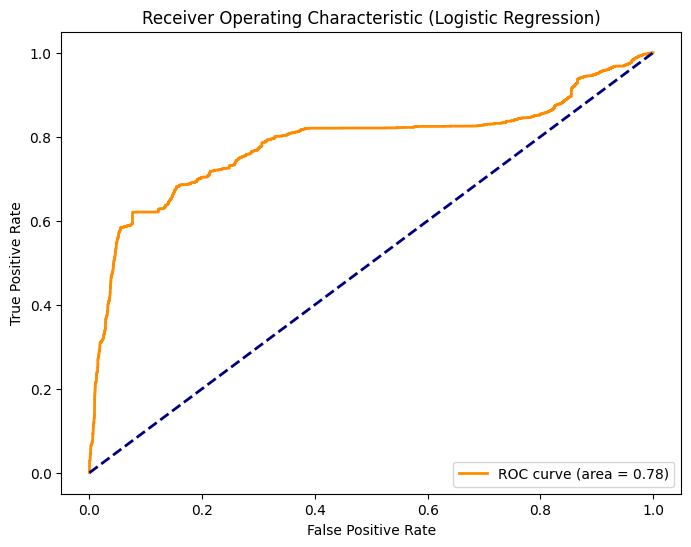

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Model Comparison (F1-Score)')

Text(0.5, 0, 'Model')

Text(0, 0.5, 'F1-Score')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'Multilayer Perceptron'),
  Text(3, 0, 'XGBoost'),
  Text(4, 0, 'Ensemble (RF+MLP)'),
  Text(5, 0, 'Ensemble (XGB+RF)'),
  Text(6, 0, 'Ensemble(XGB+RF+LSTM+MLP)')])

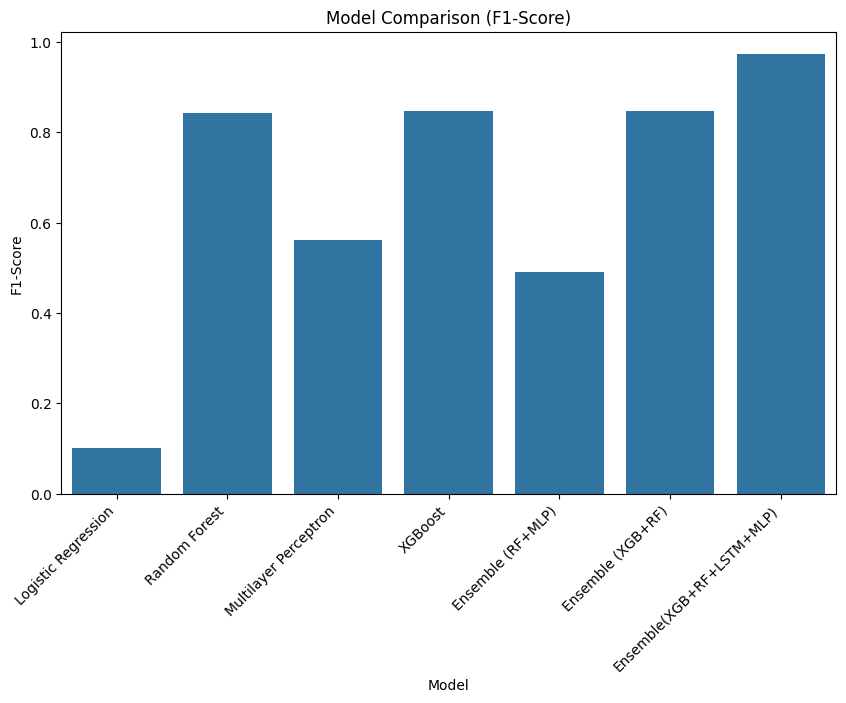

In [27]:
# Class Distribution Visualization
class_counts = df_wallets_classification['class'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Feature Importance Visualization (for Random Forest)
importances = cRF.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Confusion Matrix Visualization (for Random Forest)
cm = confusion_matrix(y_test, y_preds_RF)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve and AUC (for Logistic Regression)
from sklearn.metrics import roc_curve, auc
y_pred_proba_LR = cLR.predict_proba(X_test.values)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_LR)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

# Model Comparison (F1-Score)
model_names = ['Logistic Regression', 'Random Forest', 'Multilayer Perceptron', 'XGBoost', 'Ensemble (RF+MLP)', 'Ensemble (XGB+RF)','Ensemble(XGB+RF+LSTM+MLP)']
f1_scores = [f1_score(y_test, y_preds_LR),
             f1_score(y_test, y_preds_RF),
             f1_score(y_test, y_preds_MLP),
             f1_score(y_test, y_preds_XGB),
             f1_score(y_test, y_preds_RFMLP),
             f1_score(y_test, y_preds_XGBRF),
             0.974]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=f1_scores)
plt.title('Model Comparison (F1-Score)')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
# prompt: get h5 format of the the model

# Save the model in h5 format
model.save('my_model.keras')